In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [19]:
df = pd.read_csv('data\heart_2020_cleaned.csv')
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [20]:
df['HeartDisease'].value_counts()

HeartDisease
No     292422
Yes     27373
Name: count, dtype: int64

In [21]:
df.isnull().sum()

HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

### Removing the duplicateds


In [11]:
df.duplicated().sum()

np.int64(18078)

In [12]:
df = df.drop_duplicates()

In [13]:
df.duplicated().sum()

np.int64(0)

In [14]:
df.shape

(301717, 18)

In [15]:
df['HeartDisease'].value_counts()

HeartDisease
No     274456
Yes     27261
Name: count, dtype: int64

### Removing the unnecessary columns


In [16]:
df.drop(columns=[#'HeartDisease', 'BMI', 'Smoking', 'AlcoholDrinking', 'Stroke',
      'PhysicalHealth', 
                'MentalHealth',
                #  'DiffWalking', 'Sex', 'AgeCategory',
       'Race',
       #  'Diabetic', 'PhysicalActivity', 
         'GenHealth',
          #'SleepTime',
       #'Asthma', 'KidneyDisease', 
       'SkinCancer'
       ],inplace=True)

In [17]:
df.sample()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,DiffWalking,Sex,AgeCategory,Diabetic,PhysicalActivity,SleepTime,Asthma,KidneyDisease
294796,No,25.68,No,No,No,No,Male,45-49,No,Yes,5.0,No,No


In [437]:
num_col = df.select_dtypes(include=[int,float])
cat_col = df.select_dtypes(include=object)

In [438]:
num_col

,BMI,SleepTime
0,16.60,5.0
1,20.34,7.0
2,26.58,8.0
3,24.21,6.0
4,23.71,8.0
...,...,...
319790,27.41,6.0
319791,29.84,5.0
319792,24.24,6.0
319793,32.81,12.0


In [439]:
df['AgeCategory'].unique()

array(['55-59', '80 or older', '65-69', '75-79', '40-44', '70-74',
       '60-64', '50-54', '45-49', '18-24', '35-39', '30-34', '25-29'],
      dtype=object)

## checking for multicolinearity (if greate than 0.85 or -0.85 then highly corelated)

<Axes: >

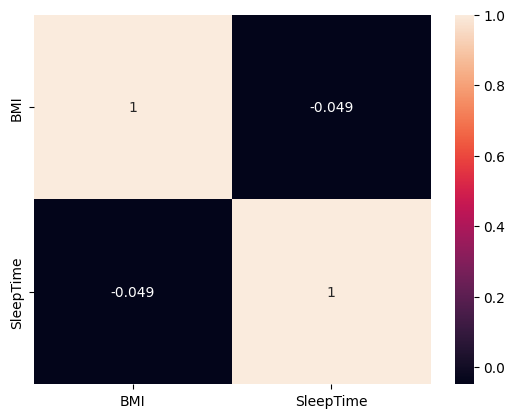

In [440]:
sns.heatmap(num_col.corr(),annot=True)

### calculating multicolinearity with vif using statsmodels 

### let's transform the BMI col (log transform) to reduce the effect of outliers

<Axes: xlabel='BMI', ylabel='Density'>

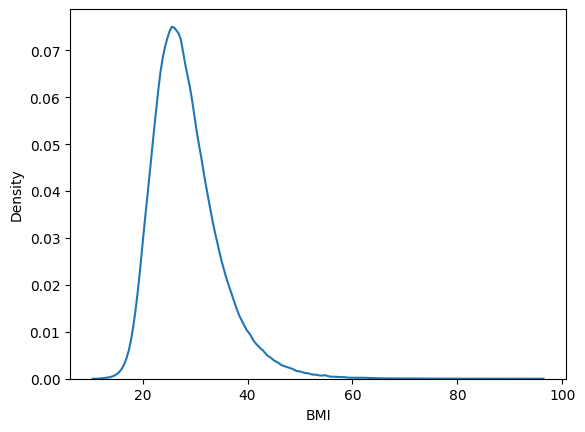

In [441]:
## before transformation

sns.kdeplot(df['BMI'])

In [442]:
from sklearn.preprocessing import FunctionTransformer
trnf = FunctionTransformer(np.log)
df['BMI']=trnf.transform(df['BMI'])

<Axes: xlabel='BMI', ylabel='Density'>

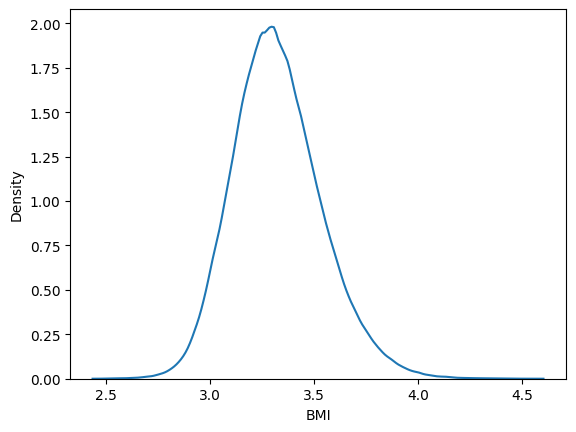

In [443]:
## after transformation

sns.kdeplot(df['BMI'])

In [23]:
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

### Down sampeling 

In [24]:
X = df.drop(columns='HeartDisease',axis='columns')
y = df['HeartDisease']
rus = RandomUnderSampler(random_state=42)
X_res,y_res = rus.fit_resample(X,y)


In [27]:
col = ['BMI', 'Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking', 'Sex',
       'AgeCategory', 'Diabetic', 'PhysicalActivity', 'SleepTime', 'Asthma',
       'KidneyDisease']
len(col)

12

In [26]:
X_res.info()

<class 'pandas.core.frame.DataFrame'>
Index: 54746 entries, 111390 to 319790
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   BMI               54746 non-null  float64
 1   Smoking           54746 non-null  object 
 2   AlcoholDrinking   54746 non-null  object 
 3   Stroke            54746 non-null  object 
 4   PhysicalHealth    54746 non-null  float64
 5   MentalHealth      54746 non-null  float64
 6   DiffWalking       54746 non-null  object 
 7   Sex               54746 non-null  object 
 8   AgeCategory       54746 non-null  object 
 9   Race              54746 non-null  object 
 10  Diabetic          54746 non-null  object 
 11  PhysicalActivity  54746 non-null  object 
 12  GenHealth         54746 non-null  object 
 13  SleepTime         54746 non-null  float64
 14  Asthma            54746 non-null  object 
 15  KidneyDisease     54746 non-null  object 
 16  SkinCancer        54746 non-null  objec

In [29]:
X_res.reset_index(drop=['index'],inplace=True)

In [30]:
y_res.reset_index(drop=['index'],inplace=True)

In [31]:
y_res

0         No
1         No
2         No
3         No
4         No
        ... 
54741    Yes
54742    Yes
54743    Yes
54744    Yes
54745    Yes
Name: HeartDisease, Length: 54746, dtype: object

In [36]:
X_train,X_test,y_train,y_test = train_test_split(X_res,y_res,test_size=0.2,random_state=42)

In [450]:
X_train.shape

(43617, 12)

In [451]:
X_train

,BMI,Smoking,AlcoholDrinking,Stroke,DiffWalking,Sex,AgeCategory,Diabetic,PhysicalActivity,SleepTime,Asthma,KidneyDisease
32523,3.234355,No,No,Yes,No,Female,65-69,Yes,Yes,7.0,No,No
23187,3.466048,Yes,No,No,No,Male,75-79,No,Yes,8.0,No,No
1681,3.281287,Yes,No,No,No,Female,60-64,No,Yes,7.0,No,No
40560,3.271848,Yes,No,No,Yes,Male,75-79,No,Yes,4.0,No,No
2279,2.846071,Yes,No,No,No,Male,18-24,No,Yes,6.0,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...,...
44732,2.955431,No,No,Yes,Yes,Female,80 or older,No,Yes,8.0,No,Yes
54343,3.173460,Yes,No,No,No,Male,70-74,No,Yes,6.0,No,No
38158,3.298057,No,No,No,No,Male,70-74,No,Yes,8.0,No,No
860,3.217275,No,No,No,No,Female,35-39,No,Yes,7.0,No,No


In [452]:
y_train.value_counts()

HeartDisease
No     21823
Yes    21794
Name: count, dtype: int64

### Encoding the categorical col


In [453]:
X_test.shape

(10905, 12)

In [454]:
X_test.shape


(10905, 12)

In [37]:
X_train_cat_col = X_train.select_dtypes(include=['object']).columns

In [45]:
min(X_train['BMI'])

12.21

In [457]:
num_col = num_col.columns

In [464]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', num_col),  # Pass through numerical columns unchanged
        ('cat', OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore'), X_train_cat_col),  # Apply OHE to categorical columns
       
    ],
    remainder='passthrough'  # Drop any columns not specified in transformers
)

In [465]:
X_train_encoded = preprocessor.fit_transform(X_train)

In [466]:
X_test_encoded = preprocessor.transform(X_test)

In [467]:
X_train_encoded.shape

(43617, 25)

In [468]:
X_test_encoded.shape

(10905, 25)

In [469]:
## Encoding the target column
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.transform(y_test)

## model building

In [507]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
from sklearn.metrics import  accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

# Dictionary with classification model names and objects
classification_models = {
    'Random Forest': RandomForestClassifier(),
    'Logistic Regression': LogisticRegression(),
    'Support Vector Machine': SVC(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Naive Bayes': GaussianNB(),
}

In [508]:
classification_models.values()

dict_values([RandomForestClassifier(), LogisticRegression(), SVC(), KNeighborsClassifier(), DecisionTreeClassifier(), GaussianNB()])

In [509]:
for i in classification_models.values():
    print(i)

RandomForestClassifier()
LogisticRegression()
SVC()
KNeighborsClassifier()
DecisionTreeClassifier()
GaussianNB()


In [510]:
classification_models.keys()

dict_keys(['Random Forest', 'Logistic Regression', 'Support Vector Machine', 'K-Nearest Neighbors', 'Decision Tree', 'Naive Bayes'])

In [511]:
classification_models.items()

dict_items([('Random Forest', RandomForestClassifier()), ('Logistic Regression', LogisticRegression()), ('Support Vector Machine', SVC()), ('K-Nearest Neighbors', KNeighborsClassifier()), ('Decision Tree', DecisionTreeClassifier()), ('Naive Bayes', GaussianNB())])

In [512]:
for model in classification_models.items():
    print(model[1])
       

RandomForestClassifier()
LogisticRegression()
SVC()
KNeighborsClassifier()
DecisionTreeClassifier()
GaussianNB()


In [515]:
def model_details(model_dict,X_train,X_test,y_train,y_test):
    for model in model_dict.items():
        
        model[1].fit(X_train,y_train)
        y_pred = model[1].predict(X_test)
        accuracy= accuracy_score(y_test,y_pred)
        f1 = f1_score(y_test,y_pred)
        recall = recall_score(y_test,y_pred)
        precision = precision_score(y_test,y_pred)

        best_model = dict()
        best_model[model[0]] = accuracy

        print('_'*10)
        print(model[0])
        print("accuracy_score:",accuracy)
        print('f1_score:',f1)
        print('recall',recall)
        print('precision',precision)

        print(best_model)



In [517]:
model_details(classification_models,X_train_encoded,X_test_encoded,y_train_encoded,y_test_encoded)

__________
Random Forest
accuracy_score: 0.6936267767079322
f1_score: 0.6985473247315709
recall 0.708066581306018
precision 0.6892806267806267
{('Random Forest', RandomForestClassifier()): 0.6936267767079322}
__________
Logistic Regression
accuracy_score: 0.7485557083906464
f1_score: 0.7551785714285715
recall 0.7735503932687031
precision 0.7376591662305948
{('Logistic Regression', LogisticRegression()): 0.7485557083906464}
__________
Support Vector Machine
accuracy_score: 0.7479138010087116
f1_score: 0.7634454866190518
recall 0.8114139381745016
precision 0.72083197920052
{('Support Vector Machine', SVC()): 0.7479138010087116}
__________
K-Nearest Neighbors
accuracy_score: 0.7119669876203576
f1_score: 0.7152570029915692
recall 0.7216023413206512
precision 0.7090222861250899
{('K-Nearest Neighbors', KNeighborsClassifier()): 0.7119669876203576}
__________
Decision Tree
accuracy_score: 0.6550206327372765
f1_score: 0.6491326245103526
recall 0.6365465520395098
precision 0.6622264509990485
{(